# US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import datetime

In [3]:
now  = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

In [4]:
xl_writer = pd.ExcelWriter(f"covid19_USA_data_{now}.xlsx")

In [5]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv?_sm_au_=iVVZQ0fSPs48H6VNRMpVsKQtC6Vvq"

In [6]:
df = pd.read_csv(url)

In [7]:
df.to_excel(xl_writer, "raw")

In [8]:
df2 = df[(df["iso2"] == "US") & (~df["Admin2"].isna())].drop(columns=["UID", "iso2", "code3", "iso3", "FIPS", "Admin2", "Country_Region", "Lat", "Long_", "Combined_Key"])

In [9]:
df4 = pd.DataFrame(df2.groupby(by=["Province_State",]).sum().T.to_records()).rename(columns={'index': 'date'})

In [10]:
df4["date"] = pd.to_datetime(df4["date"])

In [11]:
df4["day_of_year"] = df4["date"].dt.dayofyear

In [12]:
df4.set_index(['date', 'day_of_year'], inplace=True)

In [13]:
df4.to_excel(xl_writer, "USA")

In [14]:
summary = df4.max()

In [15]:
summary.sort_values(ascending=False, inplace=True)

In [16]:
summary.to_excel(xl_writer, "Summary")

In [17]:
xl_writer.close()

In [18]:
def plot_data(dataframe, logx=False, logy=False, **kwargs):
    if logx:
        df = dataframe.reset_index(level=0, drop=True)
        return df.plot(logx=logx, logy=logy, **kwargs)
    else:
        df = dataframe.reset_index(level=1, drop=True)
        return df.plot(logy=logy, **kwargs) 

In [19]:
def plot_state(dataframe, state="California", exp=False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
    if isinstance(state, (list, tuple)):
        pass
    else:
        fig.suptitle(state)
    #
    plot1 = plot_data(dataframe[state], ax=ax1)
    if exp:
        plot2 = plot_data(dataframe[state], logy=True, logx=False, ax=ax2)
    else:
        plot2 = plot_data(dataframe[state], logy=True, logx=True, ax=ax2)
    

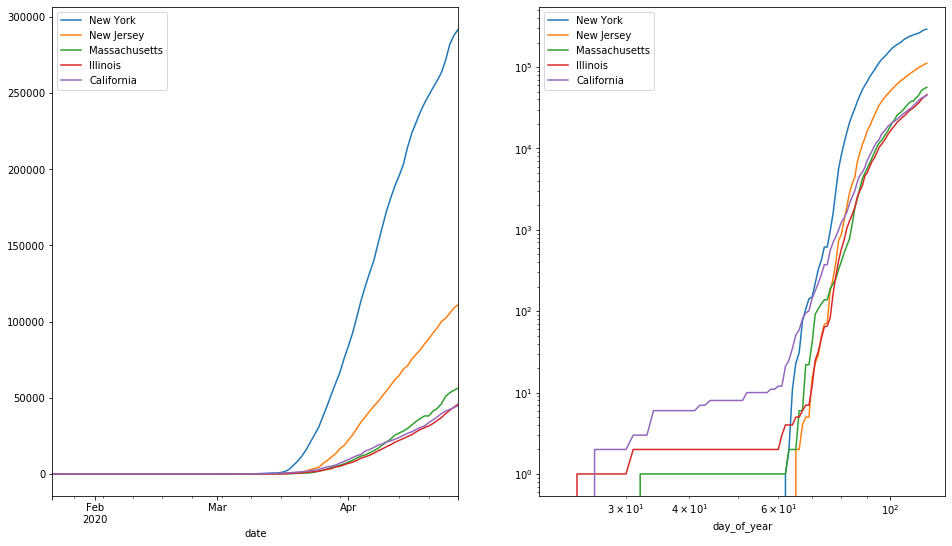

In [20]:
plot_state(df4, state=list(summary.index[:5]))

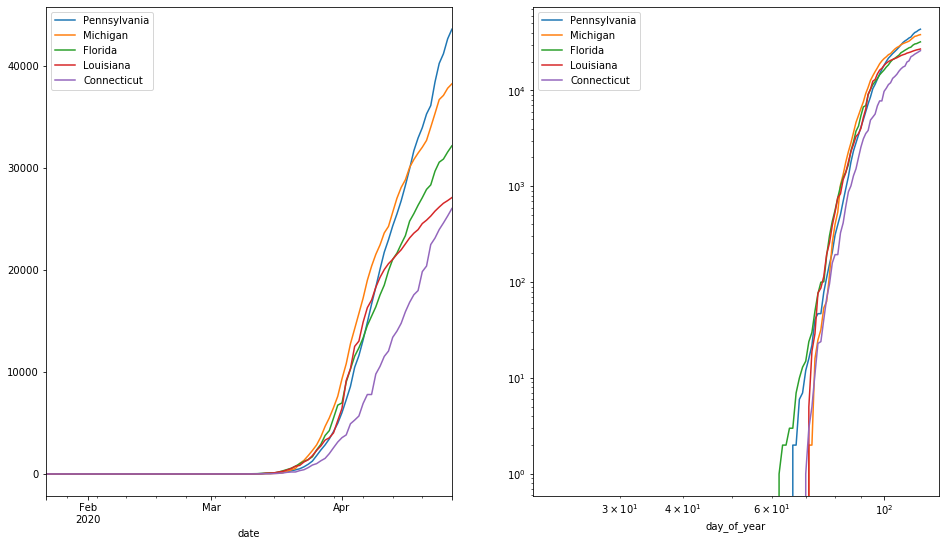

In [21]:
plot_state(df4, state=list(summary.index[5:10]))

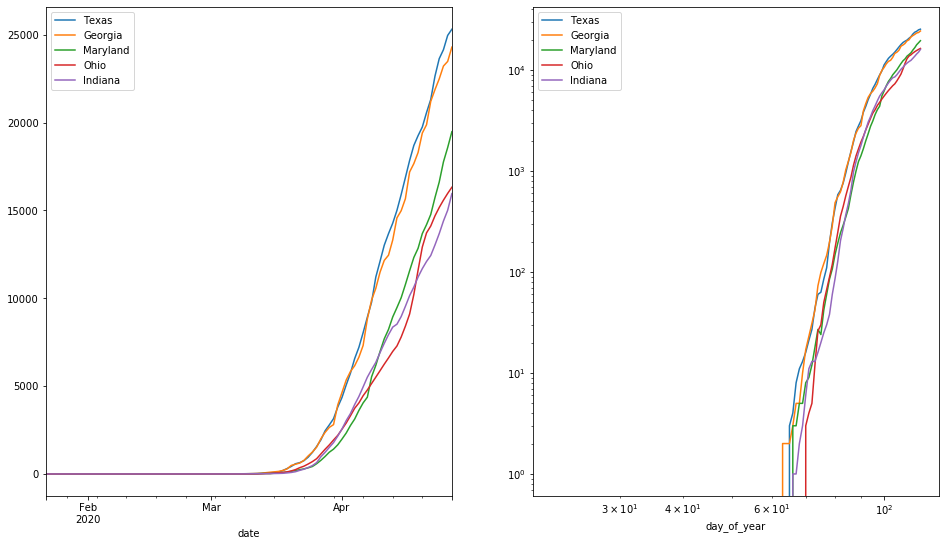

In [22]:
plot_state(df4, state=list(summary.index[10:15]))

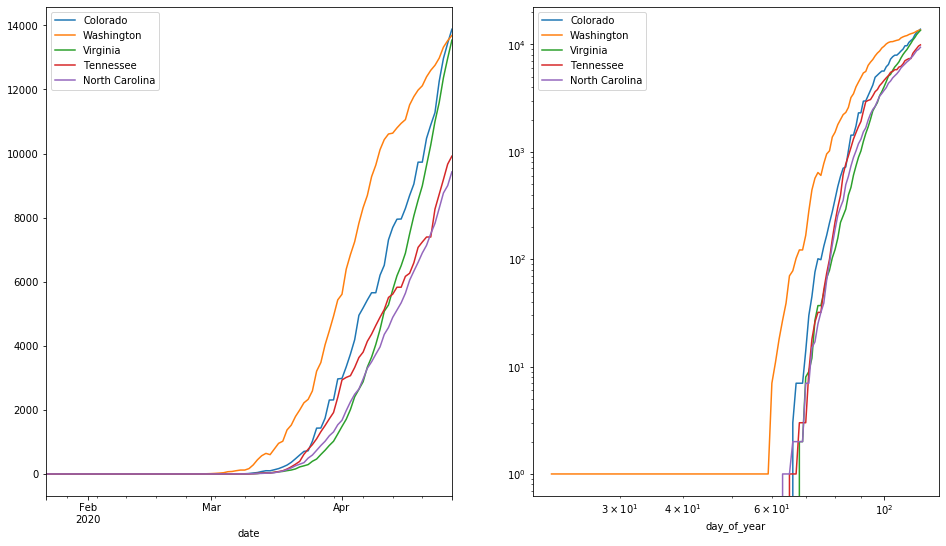

In [23]:
plot_state(df4, state=list(summary.index[15:20]))

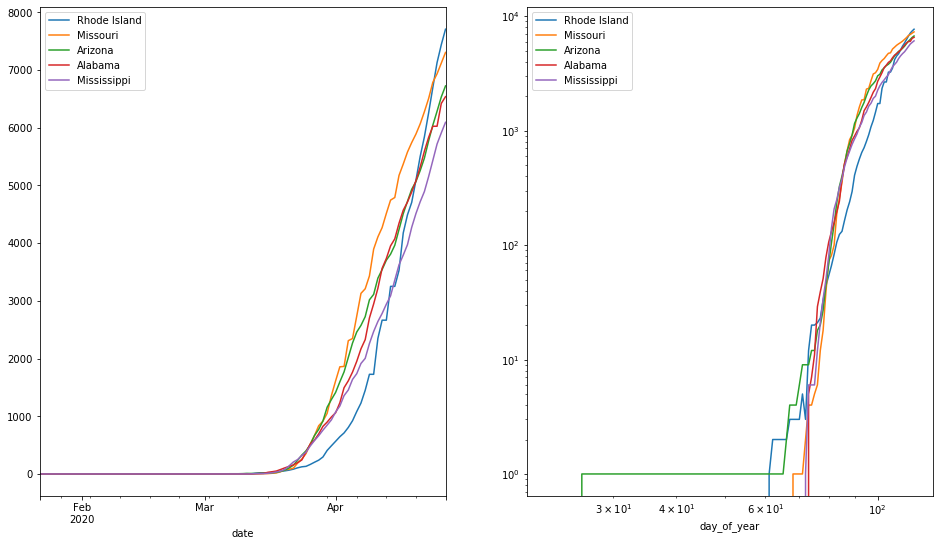

In [24]:
plot_state(df4, state=list(summary.index[20:25]))

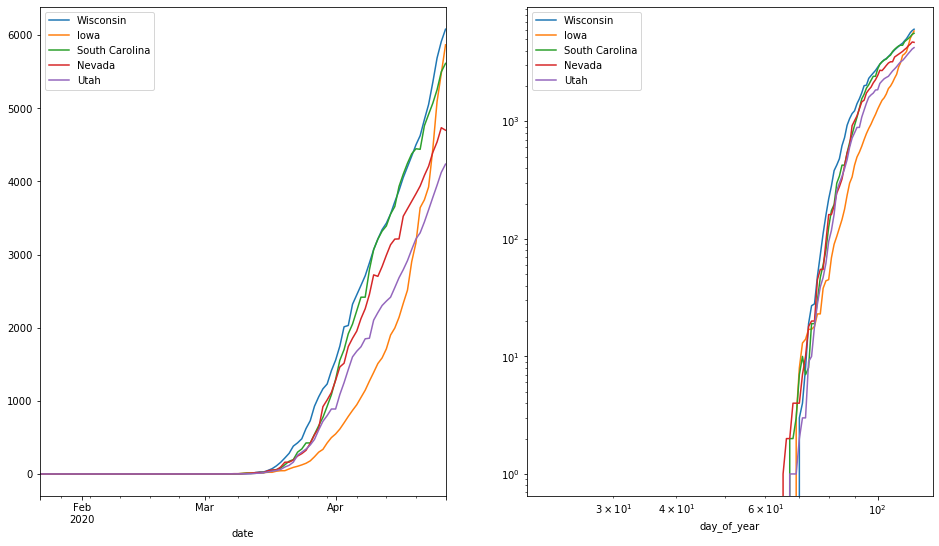

In [25]:
plot_state(df4, state=list(summary.index[25:30]))

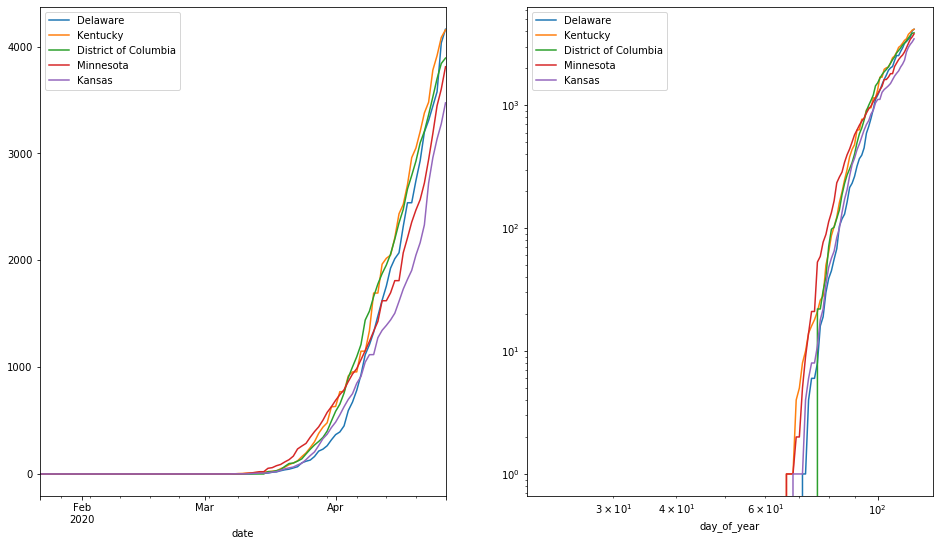

In [26]:
plot_state(df4, state=list(summary.index[30:35]))

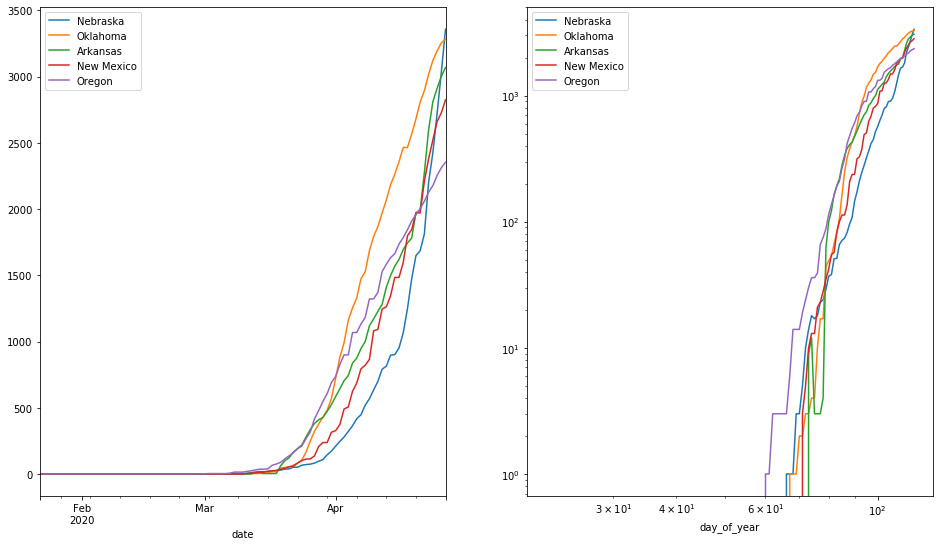

In [27]:
plot_state(df4, state=list(summary.index[35:40]))

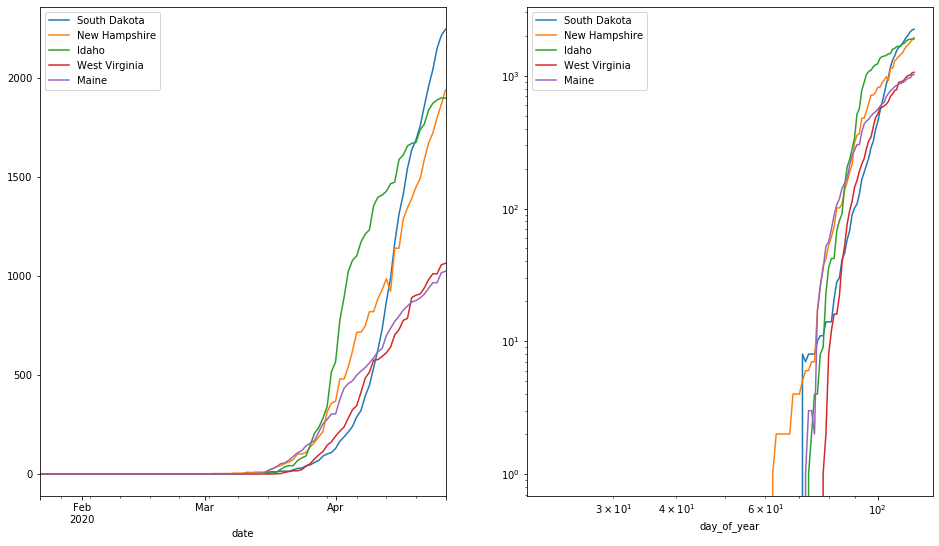

In [28]:
plot_state(df4, state=list(summary.index[40:45]))

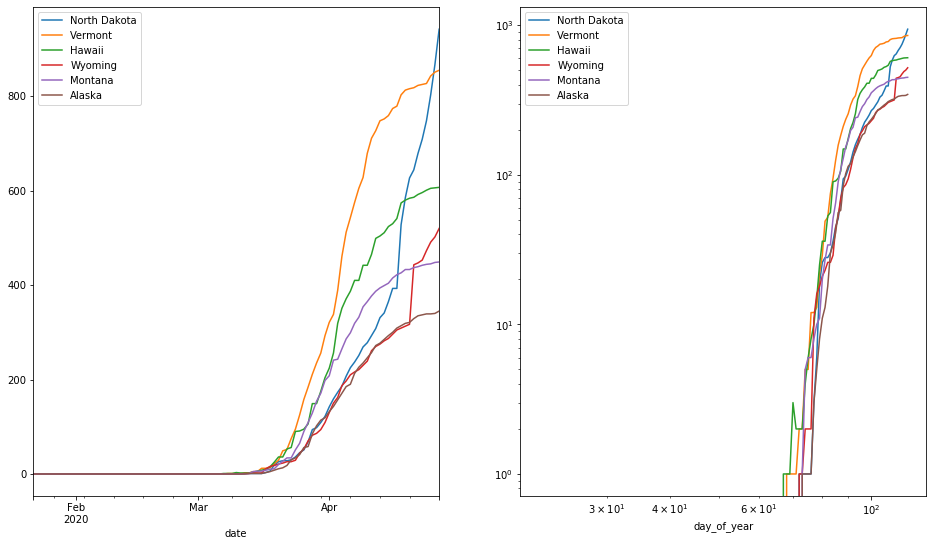

In [29]:
plot_state(df4, state=list(summary.index[45:]))